In [222]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from __future__ import division

import numpy as np
import sympy

from util import plotutil

from infotopo import predict
reload(predict)
from infotopo.models.sumexp import pred2 as pred

exp, diff, simplify = sympy.exp, sympy.diff, sympy.simplify
sympy.init_printing()

In [223]:
from infotopo.models.sumexp import exp2, Experiments

pred = exp2.get_predict(Experiments([0.5,1,2]))

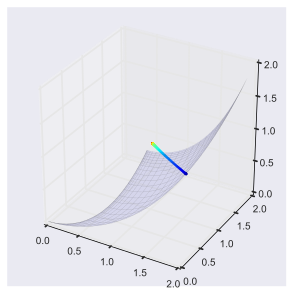

In [224]:
gds = pred.get_geodesic(p0=[0.5,0.7], ptype='logp', idx_eigenv=-1, uturn=1, lam=0, const_speed='p',
                        integrator='vode', atol=1e-3, rtol=1e-3, dt=1e-3, callback='singval', param_cb=1e-15)
gds.integrate(tmax=10, dt=0.1, print_step=0, maxncall=2000)

pred.get_in_logp().plot_image(np.linspace(-3,3,31), np.linspace(-3,3,31), pts=gds.ytraj, cs=gds.ts, alpha=0.05,
                              xyzlims=[[0,2]]*3, figsize=(5,5))

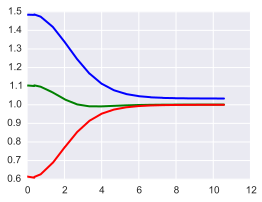

In [210]:
gds._ytraj.plot(figsize=(4,3))

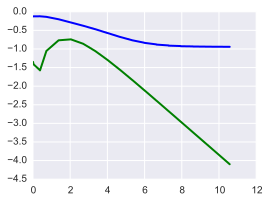

In [211]:
np.log10(gds._straj).plot(figsize=(4,3))

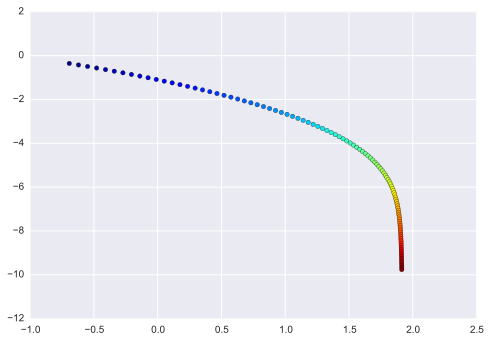

In [213]:
gds.plot_trace()

$\begin{pmatrix} p_1 \\ p_2 \\ p_3 \end{pmatrix} \mapsto \begin{pmatrix} q_1 \\ q_2 \end{pmatrix} \mapsto \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix}$

$p_1 = q_1 \\ p_2 + p_3 = q_2$

In [9]:
def q2pline(q):
    q1, q2 = q
    def pline(t):
        p1 = q1 - q2 + t
        p2 = 2 * (q2 - t)
        p3 = t
        return np.array([p1,p2,p3])
    return pline

In [18]:
ps = q2pline(gds.p)(np.linspace(0,10,11))

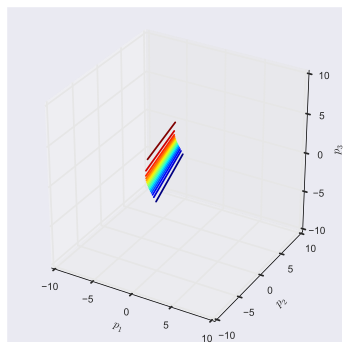

In [74]:
reload(plotutil)

fig = plotutil.plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
cs = plotutil.get_colors(len(gds.ps), 'jet')

for p, c in zip(gds.ps.values, cs):
    ps = q2pline(p)(np.linspace(-10,10,21))
    plotutil.plot3d(*ps, alpha=1, mec='none', marker='', s=0,  ax=ax, color=c,
                    xyzlabels=['$p_1$','$p_2$','$p_3$'], xyzlims=[[-10,10]]*3)


    
#plotutil.plt.show()

In [90]:
gds.t

In [113]:
gds.v0

log_r1    0.709973
log_r2   -0.704229
dtype: float64

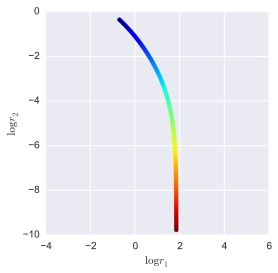

In [126]:
gds.plot_trace(figsize=(4,4), edgecolor='none', xylabels=['$\log r_1$', '$\log r_2$'], xylims=[[-4,6],[-10,0]])

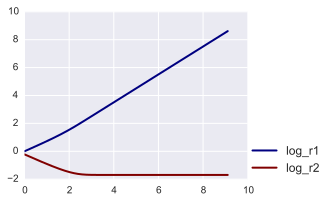

In [99]:
gds._ptraj.plot(figsize=(4,3), colorscheme='jet', legends=gds.pids)

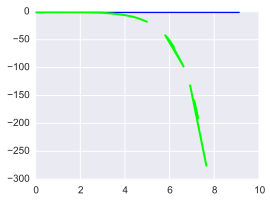

In [102]:
np.log10(gds._straj).plot(figsize=(4,3), colorscheme='brg')

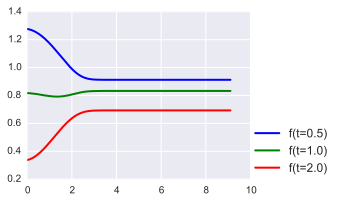

In [103]:
gds._ytraj.plot(figsize=(4,3), legends=gds.yids)

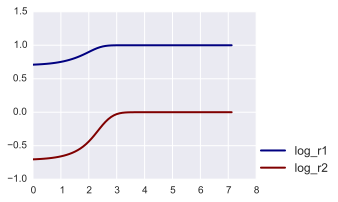

In [106]:
gds.vtraj.plot(figsize=(4,3), legends=gds.pids, colorscheme='jet')

In [183]:
t1, t2, t3 = 0.5, 1, 2
def f(p):
    p1, p2, p3 = p
    q1, q2 = p1, p2**2+p3**2
    return np.array([np.exp(-q1*t1)+np.exp(-q2*t1),
                     np.exp(-q1*t2)+np.exp(-q2*t2),
                     np.exp(-q1*t3)+np.exp(-q2*t3)])

def Df(p):
    p1, p2, p3 = p
    q1, q2 = p1, p2**2+p3**2
    dqdp = np.array([[1, 0, 0],
                     [0, 2*p2, 2*p3]])
    dydq = np.array([[-t1*np.exp(-q1*t1), -t1*np.exp(-q2*t1)],
                     [-t2*np.exp(-q1*t2), -t2*np.exp(-q2*t2)],
                     [-t3*np.exp(-q1*t3), -t3*np.exp(-q2*t3)]])
    return np.dot(dydq, dqdp)

reload(predict)
pred2 = predict.Predict(f=f, Df=Df, pids=['p1','p2','p3'], yids=['y1','y2','y3'], p0=[1,2,3])

In [238]:
gds2 = pred2.get_geodesic(p0=[0.5,0.5,0.67], ptype='logp', idx_eigenv=-2, uturn=0, lam=1e-15, const_speed='p',
                          atol=1e-6, rtol=1e-6)
gds2.integrate(10, 1, print_step=0, maxncall=2000)

In [239]:
gds2.ytraj.iloc[-1] - gds2.ytraj.iloc[0]

y1   -0.418969
y2   -0.099459
y3    0.384977
dtype: float64

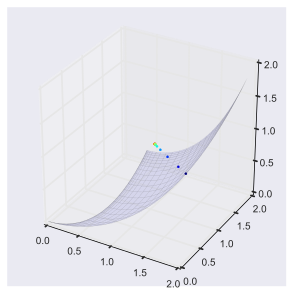

In [240]:
pred.get_in_logp().plot_image2(np.linspace(-3,3,31), np.linspace(-3,3,31), y2c=zip(gds2.ytraj.values, gds.ts), 
                               alpha=0.05, xyzlims=[[0,2]]*3, figsize=(5,5))

In [243]:
gds.Vtraj.iloc[0]

f(t=0.5)    0.026809
f(t=1.0)    0.016741
f(t=2.0)   -0.031999
Name: 0.0, dtype: float64

In [244]:
gds2.Vtraj.iloc[0]

y1   -0.030346
y2   -0.018576
y3    0.037501
Name: 0.0, dtype: float64

In [181]:
p = [1,0,0]
print pred.get_eigenv(p, idx=0)
print pred.get_eigenv(p, idx=1)
print pred.get_eigenv(p, idx=2)

print pred.get_spectrum(p)

[ 1.  0.  0.]
[ 0.  0.  1.]
[ 0.  1.  0.]
[ 0.54824055  0.          0.        ]


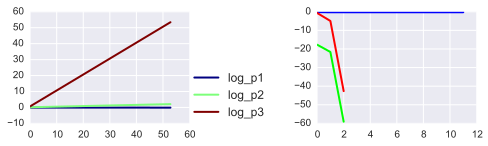

In [168]:
gds = pred.get_geodesic(p0=[1,1,2], ptype='logp', idx_eigenv=-2, uturn=1, lam=1e-15, const_speed='p')
gds.integrate(10, 1, print_step=0, maxncall=2000)

ax1, ax2 = plotutil.get_axs(1,2, figsize=(8,2), subplots_adjust={'wspace':0.8})
gds._ptraj.plot(figsize=(4,3), legends=gds.pids, ax=ax1, colorscheme='jet')
np.log10(gds.straj).plot(figsize=(4,3), ax=ax2, colorscheme='brg')

In [169]:
gdss = pred.get_geodesics(p0=[1,1,2], ptype='logp', lam=1e-12, const_speed='p')
gdss.integrate(tmax=10, dt=1)

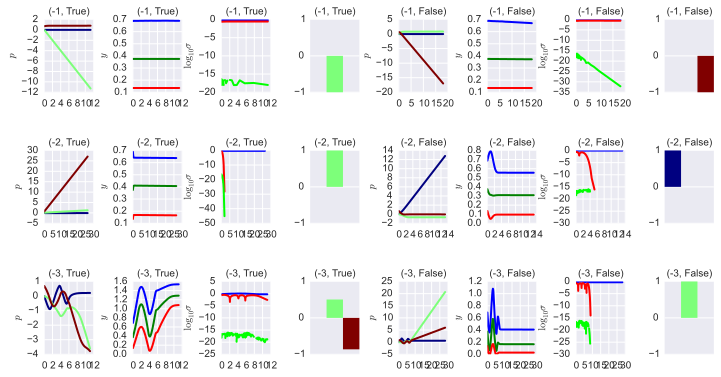

In [171]:
gdss.plot(vartypes=['_p','_y','_s','eigvt'], figsize=(12,6), subplots_adjust={'wspace':0.8,'hspace':0.8})

In [ ]:
            lgdss = pred.get_geodesics

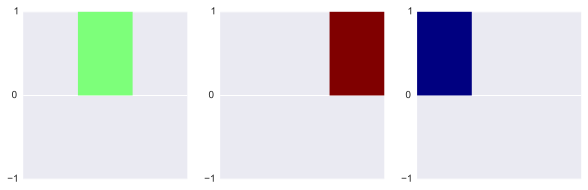

In [153]:
ax1, ax2, ax3 = plotutil.get_axs(1,3, figsize=(10,3))
pred.get_in_logp().plot_eigvec(gds.p, ax=ax1, idx=-1)
pred.get_in_logp().plot_eigvec(gds.p, ax=ax2, idx=-2)
pred.get_in_logp().plot_eigvec(gds.p, ax=ax3, idx=-3)

In [87]:
np.dot(gds.Df(gds.p0), gds.v0)

array([-0.02255502, -0.00303557,  0.0216966 ])

In [89]:
print pred.get_spectrum(pred.p0)
print pred.get_in_logp().get_spectrum(pred.p0.log())

[ 0.49715768  0.05876764]
[ 0.54617922  0.10698607]


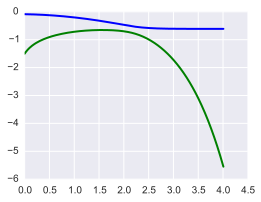

In [84]:
np.log10(gds._straj).plot(figsize=(4,3),markers='')

In [77]:
gds.stop

'maxncall'

In [56]:
gds.ytraj

,f(t=1.0),f(t=2.0),f(t=3.0)
time,,,
0.000000,1.276851,0.817208,0.524324
0.500000,1.248214,0.813833,0.551374
1.000000,1.188044,0.809947,0.604948
1.500000,1.104770,0.812173,0.671702
2.000000,1.015164,0.825383,0.733756
2.500000,0.949474,0.843025,0.772670
3.000000,0.926052,0.851105,0.785173
3.500000,0.923211,0.852153,0.786641
4.000000,0.923137,0.852181,0.786679


In [60]:
r1, r2 = sympy.symbols('r1 r2')
fx = exp(-r1) * exp(-r2)
fy = exp(-2*r1) * exp(-2*r2)
fz = exp(-3*r1) * exp(-3*r2)

In [21]:
gds.p

array([-2.36360364,  0.97160751])

In [61]:
J = np.array([[diff(fx, r1), diff(fx, r2)], 
              [diff(fy, r1), diff(fy, r2)], 
              [diff(fz, r1), diff(fz, r2)]])

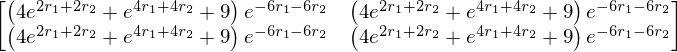

In [62]:
g11 = simplify(np.dot(J[:,0], J[:,0]))
g12 = g21 = simplify(np.dot(J[:,0], J[:,1]))
g22 = simplify(np.dot(J[:,1], J[:,1]))
g = sympy.Matrix([[g11, g12], [g21, g22]])
g
#from IPython.display import display

## Plot the heatmap of the determinant of the metric as a function of $r_1$ and $r_2$

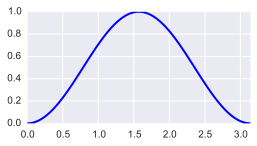

In [7]:
phis = np.linspace(0, pi, 101)
plotutil.plot([phis], [np.sin(phis)**2], markers='', figsize=(4,2), xylims=[[0,pi],None])

$A = \frac{d^2 y}{d t^2} = \frac{d V}{d t} = \frac{d (Jv)}{d t} \\
= A_a + A_v \\
= J a + \frac{d J}{d t} v = J a + (\frac{\partial J}{\partial p} \frac{d p}{d t}) v$

$A_v = A \bigg|_{v, a=0}$ is the term in $A$ that doesn't depend on acceleration $a$, but only velocity $v$. Hence the finite difference method in the code.

$\frac{\partial J}{\partial p}: \; \frac{\partial J_{\cdot \alpha}}{\partial p^\beta} = \nabla_\beta J_{\cdot \alpha} + n^\alpha_\beta = \Gamma^\mu_{\alpha \beta} J_{\cdot \mu} + n^\alpha_\beta$

Writing the rest of the terms in components:

$A_m = J_{m \mu} a^\mu + (\Gamma^\mu_{\alpha \beta} J_{m \mu} + n^\alpha_\beta) v^\beta v^\alpha$

Geodesic equation says that the sum of all the non-normal terms has to be zero:

$(P_{//} A)_m = 0 \\
\Rightarrow J_{m \mu} a^\mu + \Gamma^\mu_{\alpha \beta} J_{m \mu} v^\beta v^\alpha = 0 \\ 
\Rightarrow a^\mu + \Gamma^\mu_{\alpha \beta} v^\beta v^\alpha = 0$

Generally,

$\Gamma^\mu_{\alpha \beta} = \frac{1}{2} g^{\mu \nu} \left( \partial_\beta g_{\nu \alpha} + \partial_\alpha g_{\nu \beta} - \partial_\nu g_{\alpha \beta} \right)$, where $\nu$ is the dummy variable.

For the sphere's $g$: 

$\Gamma^1_{11} = 0$

$\Gamma^1_{12} = 0$

$\Gamma^\phi_{\phi \theta} = \frac{1}{2} g^{\phi \phi} \left( \partial_\theta g_{\phi \phi} + \color{red}{\partial_\phi g_{\phi \theta} - \partial_\phi g_{\phi \theta}} \right) + \frac{1}{2} \color{red}{g^{\phi \theta}} \left(\partial_\theta g_{\theta \phi} + \partial_\phi g_{\theta \theta} - \partial_\theta g_{\phi \theta} \right) = \frac{1}{2} g^{\phi \phi} \color{red}{\partial_\theta g_{\phi \phi}} = 0$

$\Gamma^\theta_{\phi \theta} = \frac{1}{2} \color{red}{g^{\theta \phi}} \left( \partial_\theta g_{\phi \phi} + \partial_{\phi} g_{\phi \theta} - \partial_\phi g_{\phi \theta} \right) + \frac{1}{2} g^{\theta \theta} \left(\partial_\theta g_{\theta \phi} + \partial_\phi g_{\theta \theta} - \partial_\theta g_{\phi \theta} \right) = \frac{1}{2} g^{\theta \theta} \partial_\phi g_{\theta \theta} = \frac{1}{2} \frac{1}{\sin^2 \phi} 2 \sin \phi \cos \phi = \frac{\cos \phi}{\sin \phi} = \cot \phi$

$\Gamma^\phi_{\theta \phi} = \Gamma^\phi_{\phi \theta} = 0$

$\Gamma^\theta_{\theta \phi} = \Gamma^\theta_{\phi \theta} = \cot \phi$

$\Gamma^\phi_{\theta \theta} = \frac{1}{2} g^{\phi \phi} \left(\color{red}{\partial_{\theta} g_{\phi \theta} + \partial_{\theta} g_{\theta \phi}} - \partial_{\phi} g_{\theta \theta} \right) + \frac{1}{2} \color{red}{g^{\phi \theta}} (\cdots) = -g^{\phi \phi} \partial_{\phi} g_{\theta \theta} = - \sin \phi \cos \phi$

$\Gamma^\theta_{\theta \theta} = 0$

Geodesic equation:

$\ddot{\phi} + \color{red}{\Gamma^\phi_{\phi \phi}} \dot{\phi} \dot{\phi} + \color{red}{\Gamma^\phi_{\phi \theta}} \dot{\phi} \dot{\theta} + \color{red}{\Gamma^\phi_{\theta \phi}} \dot{\theta} \dot{\phi} + \Gamma^\phi_{\theta \theta} \dot{\theta} \dot{\theta} = 0 \quad \Rightarrow \quad \ddot{\phi} - \sin \phi \cos \phi \dot{\theta} \dot{\theta} = 0$

$\ddot{\theta} + \color{red}{\Gamma^\theta_{\phi \phi}} \dot{\phi} \dot{\phi} + \Gamma^\theta_{\phi \theta} \dot{\phi} \dot{\theta} + \Gamma^\theta_{\theta \phi} \dot{\theta} \dot{\phi} + \color{red}{\Gamma^\theta_{\theta \theta}} \dot{\theta} \dot{\theta} = 0 \quad \Rightarrow \quad \ddot{\theta} + 2 \cot \phi \dot{\phi} \dot{\theta} = 0$

The same equation can be using [**Euler-Lagrange equation**](http://sgovindarajan.wikidot.com/twosphere). 

In [73]:
def rhs(t, pv):
    p, v = pv[:2], pv[2:]
    ph, th = p
    vph, vth = v
    a = [np.sin(ph) * np.cos(ph) * vth * vth, - 2 / np.tan(ph) * vph * vth]
    return np.append(v, a)

In [207]:
from scipy.integrate import ode as ODE

ode = ODE(rhs).set_initial_value([pi/2, 0, np.sqrt(2)/2, np.sqrt(2)/2])

def get_sol(ode, tmax, dt=None, nstep=None):
    if nstep is not None:
        dt = tmax / nstep
    ts, sol = [], [ode.y]
    while ode.successful() and ode.t < tmax:
        ts.append(ode.t)
        sol.append(ode.integrate(ode.t+dt))
    ts.append(ode.t)
    return ts, np.array(sol)

ts, sol = get_sol(ode, 2*pi, nstep=100)

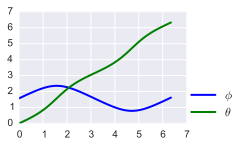

In [208]:
plotutil.plot([ts]*2, sol.T[:2], markers='', figsize=(3,2), legends=[r'$\phi$', r'$\theta$'])

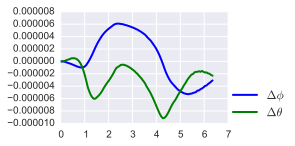

In [209]:
plotutil.plot([ts]*2, sol.T[:2]-gds.ps.values.T, markers='', figsize=(3,2), 
              legends=[r'$\Delta \phi$', r'$\Delta \theta$'])